In [1]:
#importing the dependences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

LOADING THE DATASET

In [2]:
#loading the datset
diabetes_dataset = pd.read_csv("diabetes_dataset.csv")
diabetes_dataset.shape

(10000, 21)

CLEANING THE DATASET

In [3]:
#checking for the null values
diabetes_dataset.isnull().sum()

Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64

In [4]:
#replacing the null value present in Alcohol_Consumption with never
diabetes_dataset['Alcohol_Consumption'].fillna("Never")

0       Moderate
1       Moderate
2          Heavy
3       Moderate
4          Heavy
          ...   
9995       Never
9996       Never
9997       Heavy
9998    Moderate
9999       Heavy
Name: Alcohol_Consumption, Length: 10000, dtype: object

In [5]:
#converting the categorical values into numerical values
diabetes_dataset = diabetes_dataset.replace({'Sex':{'Male':0,'Female':1},
                                             'Ethnicity':{'White':0,'Asian':1,'Black':2,'Hispanic':4},
                                             'Physical_Activity_Level':{'Low':0,'Moderate':1,'High':2},
                                             'Alcohol_Consumption':{'Never':0,'Moderate':1,'Heavy':2},
                                             'Smoking_Status':{'Never':0,'Former':1,'Current':2}})

#Removing the unwanted dataset
diabetes_dataset= diabetes_dataset.drop(['Unnamed: 0'],axis=1)


C:\Users\Abhay Kalojia\AppData\Local\Temp\ipykernel_7172\3092176800.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes_dataset = diabetes_dataset.replace({'Sex':{'Male':0,'Female':1},


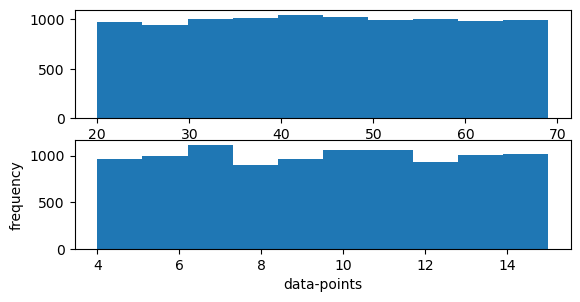

In [21]:
#creating figures for multiple plots
new_fig=plt.figure()
#adding axis to figures
axes1=new_fig.add_subplot(3,1,1)
axes2=new_fig.add_subplot(3,1,2)
#specifying the plots
axes1.hist(diabetes_dataset['Age'])
axes2.hist(diabetes_dataset['HbA1c'])
plt.xlabel("data-points")
plt.ylabel("frequency")
plt.show()

In [7]:
#Since We're not provided with any labels, so creating a self parameter to check whether the patient is diabetic or not.
diabetes_dataset['Diabetes'] = diabetes_dataset['HbA1c'].apply(lambda x:1 if x>=7.8 else 0)

(array([3419.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6581.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

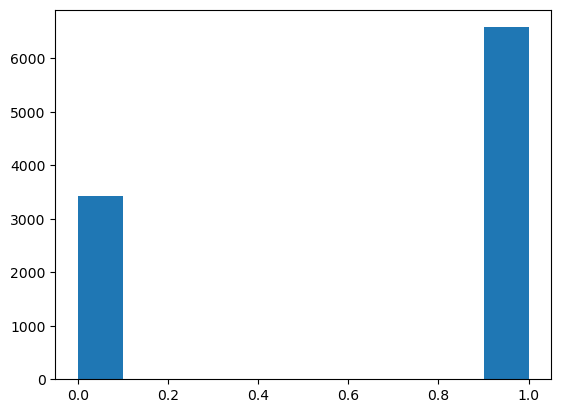

In [8]:
#Checking whether we've equal distribution of diabetic patient to avoid underfitting
plt.hist(diabetes_dataset['Diabetes'])

In [9]:
#our original dataset is highly biased, so creating a new dataset the contains equal proportion of 0's and 1's

#dataSet that contains the data of diabetic patient
diabetic_dataset = diabetes_dataset.loc[diabetes_dataset['Diabetes']==1]

#similarly another dataSet that contains the data about non-disbetic patients
non_diabetic_dataset = diabetes_dataset.loc[diabetes_dataset['Diabetes']==0]

In [10]:
#now collecting equal proportions of data from diabetic dataset.
diabetic_dataset=diabetic_dataset.sample(n=len(non_diabetic_dataset))
print(diabetic_dataset.shape, non_diabetic_dataset.shape)

(3419, 21) (3419, 21)


In [11]:
#concatenating both the temporary datsets to create a equally distributed dataset
new_diabetes_dataset=pd.concat([diabetic_dataset,non_diabetic_dataset],axis=0)
#checking the values of the new dataset
new_diabetes_dataset.head()

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes
1846,25,1,4,19.4,75.7,164.4,14.9,130,91,297.3,...,122.9,94.2,4.7,2,3108,1.0,0,1,1,1
1265,44,0,1,35.6,101.9,193.9,9.0,161,102,273.2,...,97.7,30.5,4.2,1,2602,1.0,1,1,1,1
6830,25,1,1,28.4,80.0,198.9,8.2,90,102,161.2,...,100.9,78.6,7.7,0,2809,1.0,1,0,0,1
1185,55,0,2,30.6,87.9,104.4,13.8,97,63,178.4,...,174.8,66.0,3.7,2,2521,1.0,0,1,1,1
1199,45,1,4,29.2,76.4,165.9,13.8,133,76,240.6,...,197.6,94.5,4.3,1,3537,NaN,1,0,1,1


In [12]:
#spliting our data into dependent and independent variables
X=new_diabetes_dataset.drop("Diabetes",axis=1)
y=new_diabetes_dataset['Diabetes']

In [13]:
#dividing our dataset into train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=12)

In [14]:
#overViewing the test and train dataset
print(X_train.shape,y_train.shape)

(4786, 20) (4786,)


CREATING THE MODEL TO MAKE PREDICTIONS

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
#creating the object of decision tree
decisionTree_model = DecisionTreeClassifier()

In [17]:
#training the model with the training and testing data
decisionTree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
#making the prediction
y_pred=decisionTree_model.predict(X_test)
print("accuarcy of decision tree model = ",accuracy_score(y_pred,y_test)*100,"%")

accuarcy of decision tree model =  100.0 %


In [19]:
#knowing the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1026
           1       1.00      1.00      1.00      1026

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052

